In [29]:
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
from pandas import DataFrame 

In [2]:
# Requesting  Siw Initial Water Saturation  and Sor Residual Oil Saturation input
Siw_str = input('Enter the initial water saturation')  #default=.363
Sor_str = input('Enter the residual oil saturation')   #default=.205

# Converting to Float
Siw = float(Siw_str)
Sor = float(Sor_str)

Enter the initial water saturation.363
Enter the residual oil saturation.205


In [3]:
# requesting input for No of Sw's for fw v/s Sw plot, the Sw grid resolution
no_of_sats_str = input("Enter the number of saturations you want to plot")  #default =10000 for higher accuracy

#convert to integer
no_of_sats = int(no_of_sats_str)



Enter the number of saturations you want to plot10000


In [4]:
#initializaing Swd array 
Swd = np.empty([no_of_sats])

#initializaing Sw array 
Sw = np.empty([no_of_sats])

#Initializing kro
kro = np.empty([no_of_sats])

#Initializing krw
krw = np.empty([no_of_sats])

#Initializing krw
fw = np.empty([no_of_sats])



In [5]:
# requesting input for alphas   
alpha_1_str = input("Please enter the alpha 1") #default 1.0
alpha_2_str = input("Please enter the alpha 2") #deafult .78

# Converting to float
alpha_1 = float(alpha_1_str)
alpha_2 = float(alpha_2_str)



Please enter the alpha 11
Please enter the alpha 2.78


In [6]:
# requesting input for alphas
m_str = input("Please enter the m") #default=2.56
n_str = input("Please enter the n") #deafult= 3.72

# Converting to float
m = float(m_str)
n = float(n_str)




Please enter the m2.56
Please enter the n3.72


In [7]:
# requesting input for oil and water viscoity
mu_oil_str = input("Please enter the viscosity of oil")  #default 2
mu_water_str = input("Please enter the viscosity of water") #default 1

# Converting to Float
mu_oil = float(mu_oil_str)
mu_water = float(mu_water_str)


Please enter the viscosity of oil2
Please enter the viscosity of water1


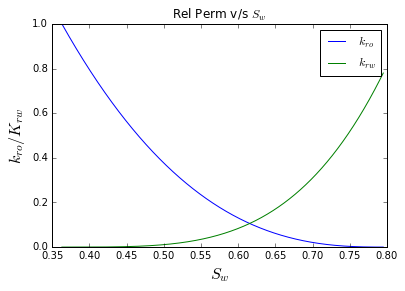

In [8]:

#Calculating fw and Sw array
for i in range(no_of_sats):
    Sw[0] = Siw    # Setting Siw as initial value of Sw
    increment_Sw = (1-Siw-Sor)/no_of_sats #Increment in Sw for plot
    Swd[i] = (Sw[i]-Siw)/(1-Sor-Siw)   # equation 3.111
    kro[i] = alpha_1*(1-Swd[i])**m   # equation 3.109 
    krw[i] = alpha_2*Swd[i]**n # equation 3.110
    fw[i]= 1/( 1 + (kro[i]*mu_water)/(krw[i]*mu_oil)) 
    if i < no_of_sats - 1 :
        Sw[i+1] = Sw[i] + increment_Sw

        
        
plt.plot(Sw,kro, label='$k_{ro}$')
plt_krw = plt.plot(Sw,krw,label='$k_{rw}$')
plt.ylabel('$k_{ro}/K_{rw}$',fontsize = 16)
plt.xlabel('$S_w$',fontsize = 16)
plt.title('Rel Perm v/s $S_w$')
plt.legend()

       

The water front saturations is =  0.6638448
The slope of tangent line is = 2.97727434781


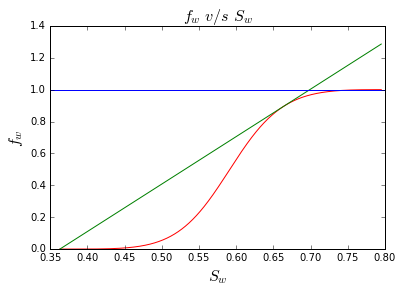

In [9]:


# Generate a plot of fw v/s Sw
fw_versus_Sw = plt.plot(Sw,fw,'r')
plt.xlabel('$S_w$',fontsize = 16)
plt.ylabel('$f_w$',fontsize = 16)
plt.title('$f_w$ $v/s$ $S_w$',fontsize = 16)

# calculating f'w
fw_dash = np.diff(fw)/np.diff(Sw)
b=[0]
# adding one element to make no of fw_dash= no_of_Sats
fw_dash = np.concatenate((fw_dash,b))

#initalizing slope of line array
slope_of_line = np.empty([no_of_sats])
len(slope_of_line)

#initializing y coordinate of line
y=np.empty([no_of_sats])

# calculating slope of line 
for i in range(no_of_sats):
    slope_of_line[i] = (fw[i]-fw[0])/(Sw[i]-Sw[0])

# criteria for matching the slope    
for i in range(len(fw_dash)-1,0,-1):
    if((slope_of_line[i] - fw_dash[i]) <= .0001):
        Swf = Sw[i]
        no_of_Swf = i
        print('The water front saturations is = ',Swf)
        m_line = slope_of_line[i]
        print('The slope of tangent line is =', slope_of_line[i])
        break
        
#calculating Sw_bar from interesction of tangent to fw and y=1
for i in range(no_of_sats):
    y[i] = m_line*Sw[i] - Siw*m_line

Sw_bar= (1 + (Siw*m_line))/m_line
Sw_bar

plt.plot(Sw,y,'g')
plt.axhline(y=1,)

In [10]:

dframe=pd.read_csv('streamtube.csv')
dframe.convert_objects(convert_numeric=True)

# for cell count in stream tube
cell_count = dframe.Cell_No.size

E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [11]:
#dframe output chec
dframe


,Cell_No,Xi,A,V_j,ratio_Vj_VT,G_J
0,0,0.50,0.12,0.00,0.000,0.00
1,1,52.78,12.90,340.31,0.030,19.07
2,2,74.64,18.24,680.62,0.050,1.42
3,3,91.41,22.34,1020.93,0.080,0.83
4,4,105.55,25.79,1361.24,0.100,0.59
5,5,118.01,28.84,1701.56,0.130,0.46
6,6,129.27,31.59,2041.87,0.150,0.37
7,7,139.63,34.12,2382.18,0.180,0.32
8,8,149.27,36.48,2722.49,0.200,0.27
9,9,158.33,38.69,3062.80,0.230,0.24


In [12]:
dframe.Xi

0       0.50
1      52.78
2      74.64
3      91.41
4     105.55
5     118.01
6     129.27
7     139.63
8     149.27
9     158.33
10    166.89
11    175.04
12    182.82
13    190.29
14    197.47
15    204.40
16    211.10
17    217.60
18    223.91
19    230.04
20    236.02
21    242.00
22    248.13
23    254.44
24    260.94
25    267.64
26    274.57
27    281.75
28    289.22
29    297.00
30    305.15
31    313.71
32    322.77
33    332.41
34    342.77
35    354.03
36    366.49
37    380.63
38    397.40
39    419.26
40    471.54
Name: Xi, dtype: float64

In [200]:
# ask for Qi
# displacement has to be advanced in time 
# for a particular qi, find out which streamtube cell has Sw = Swf
# using in eqaution 4.57


def Saturations_in_Streamtube():
#f_prime is f' in streamtube elements    
    f_prime_sw = np.empty(cell_count)  
      
    #Qi_str = input('Please enter the no. of pore volumes injected')
    #Qi = float(Qi_str)
    import math
    cell_with_swf = math.floor(m_line*Qi*cell_count) # using equation 4.57
    cell_with_swf

#then calculate f'sw from equation 4.54
    for i in range(1,cell_with_swf):
        f_prime_sw[i] = (dframe.ratio_Vj_VT[i])/Qi 
    
#then calculate f'sw for cells ahead of waterfront
    for i in range(cell_with_swf,cell_count):
        f_prime_sw[i] =0
    print(f_prime_sw,'f_prime_sw')
    
    Sw_j=np.empty(cell_count)

# Finding Sw corresponding to fprime_sw or fw_dash 
    for j in range(0,cell_with_swf):
        for i in range(no_of_sats):
            if (abs(fw_dash[i]-f_prime_sw[j]) <= .001):
                if((Sw[i])>Swf):
                    Sw_j[j]=Sw[i]
                              
# Swj = 0 for cells ahead of waterfront                # then calculate S[w] for each J
    for j in range(cell_with_swf,cell_count):
        Sw_j[j]= Siw


# ** Section for relative permeability corresponsing Sw_j values which depend on Q_inj**        
# before breakthough equation 4.61
# we need lambda_ro_bar, lambda_rw_bar for individual j's 

#kro_j and Kro_w

    #initializing
    kro_j = np.empty(cell_count)
    krw_j = np.empty(cell_count)
    Swd_j = np.empty(cell_count)
    lambda_rw_j= np.empty(cell_count)
    lambda_ro_j= np.empty(cell_count)
    lambda_rw_j_bar = np.empty(cell_count)
    lambda_ro_j_bar = np.empty(cell_count)
    
    
    #kro_j and Krw_j for 1-Sor>Sw>Swf
    for j in range(cell_with_swf):
        Swd_j[j] = (Sw_j[j]-Siw)/(1-Sor-Siw)   # equation 3.111
        kro_j[j] = alpha_1*(1-Swd_j[j])**m   # equation 3.109 
        krw_j[j] = alpha_2*Swd_j[j]**n # equation 3.110
    
    #kro and krw for cells ahead of breakthrough
    for j in range(cell_with_swf,cell_count):
        Swd_j[j] = (Siw-Siw)/(1-Sor-Siw)   # equation 3.111
        kro_j[j] = alpha_1*(1-Swd_j[j])**m   # equation 3.109 
        krw_j[j] = alpha_2*Swd_j[j]**n # equation 3.110
    #print('kro_j',kro_j)
    print('krw_j',krw_j)


#intializing lambda_ro_j array
    lambda_ro_j = np.empty(cell_count)
    
#lambda_ro_j for 1-Sor>Sw>Swf    to be used in equation 4.61

        
#lambda_ro_j and lambda_rw_j for 1-Sor>Sw>Swf        
    for j in range(cell_with_swf):
        lambda_ro_j[j] = (krw_j[j]/mu_oil)
        lambda_rw_j[j] = (krw_j[j]/mu_water)

#lambda_ro_j and lambda_rw_j for Sw<Swf    to be used in equation 4.61
    for j in range(cell_with_swf,cell_count):
        lambda_ro_j[j] =(kro_j[j]/mu_oil)
        lambda_rw_j[j] = (krw_j[j]/mu_water)
    #print('lambda_ro',lambda_ro_j)
    #print('lambda_rw',lambda_rw_j)
   
        

    
#lambda_ro_j_bar and lambda_rw_j for 1-Sor>Sw>Swf
    for j in range(cell_with_swf):
        lambda_ro_j_bar[j+1] =((lambda_ro_j[j+1])+(lambda_ro_j[j]))*.5    #4.52
        lambda_rw_j_bar[j+1] =((lambda_rw_j[j+1])+(lambda_rw_j[j]))*.5    #4.53
        
    print('lambda_rw_j_bar',lambda_rw_j_bar)
    print('lambda_ro_j_bar',lambda_ro_j_bar)
#total resitance in flooded portion
    sigma = 0
    for j in range(1,cell_with_swf):
        sigma = sigma + dframe.G_J[j]/(lambda_ro_j_bar[j] +lambda_rw_j_bar[j])
    resis_1 = 1/sigma
    
#total resitance in area ahead of water front flooded portion
    sigma = 0
    for j in range(cell_with_swf,cell_count):
        sigma = sigma + dframe.G_J[j]/lambda_ro_j[j]
    resis_2 = 1/sigma
    
    #print('resistance=',resis_1,resis_2)
    
    print('lambda_r_inv', 1/(lambda_rw_j_bar+lambda_ro_j_bar))
   

    
#relative perm corresponding to Sw_j    
        
    

      
    plt.plot(dframe.ratio_Vj_VT,Sw_j,label= 'Qi = %s'%(Qi)) #notice how to print the variable and text in legend 
    plt.legend()

    
def Saturations_in_Streamtube_abt():
#f_prime is f' in streamtube elements    
    f_prime_sw = np.empty(cell_count)  
      
    #Qi_str = input('Please enter the no. of pore volumes injected')
    #Qi = float(Qi_str)
    

#then calculate f'sw from equation 4.54
    for i in range(cell_count):
        f_prime_sw[i] = (dframe.ratio_Vj_VT[i])/Qi 
    print(f_prime_sw,'f_prime_sw')
    Sw_j=np.empty(cell_count)

# Finding Sw corresponding to fprime_sw or fw_dash 
    for j in range(cell_count):
        for i in range(no_of_sats):
            if (abs(fw_dash[i]-f_prime_sw[j]) <= .001):
                if((Sw[i])>Swf):
                    Sw_j[j]=Sw[i]


# ** Section for relative permeability corresponsing Sw_j values which depend on Q_inj**        
# before breakthough equation 4.61
# we need lambda_ro_bar, lambda_rw_bar for individual j's 

#kro_j and Kro_w

    #initializing
    kro_j = np.empty(cell_count)
    krw_j = np.empty(cell_count)
    Swd_j = np.empty(cell_count)
    lambda_rw_j= np.empty(cell_count)
    lambda_ro_j= np.empty(cell_count)
    lambda_rw_j_bar = np.empty(cell_count)
    lambda_ro_j_bar = np.empty(cell_count)
    
    
    #kro_j and Krw_j for 1-Sor>Sw>Swf
    for j in range(cell_count):
        Swd_j[j] = (Sw_j[j]-Siw)/(1-Sor-Siw)   # equation 3.111
        kro_j[j] = alpha_1*(1-Swd_j[j])**m   # equation 3.109 
        krw_j[j] = alpha_2*Swd_j[j]**n # equation 3.110

#intializing lambda_ro_j array
    lambda_ro_j = np.empty(cell_count)

        
#lambda_ro_j and lambda_rw_j       
    for j in range(cell_count):
        lambda_ro_j[j] = (krw_j[j]/mu_oil)
        lambda_rw_j[j] = (krw_j[j]/mu_water)

    
#lambda_ro_j_bar and lambda_rw_j 
    for j in range(cell_count-1):
        lambda_ro_j_bar[j+1] =((lambda_ro_j[j+1])+(lambda_ro_j[j]))*.5    #4.52
        lambda_rw_j_bar[j+1] =((lambda_rw_j[j+1])+(lambda_rw_j[j]))*.5    #4.53
        
    #print('lambda_rw_j_bar',lambda_rw_j_bar)
    #print('lambda_ro_j_bar',lambda_ro_j_bar)
    
#total resitance in flooded portion
    sigma = 0
    for j in range(cell_count):
        sigma = sigma + dframe.G_J[j]/(lambda_ro_j_bar[j] +lambda_rw_j_bar[j])
    resis_1 = 1/sigma
    
    
    #print('resistance=',resis_1,resis_2)
    
    print('lambda_r_inv', 1/(lambda_rw_j_bar+lambda_ro_j_bar))
  
    plt.plot(dframe.ratio_Vj_VT,Sw_j,label= 'Qi = %s'%(Qi)) #notice how to print the variable and text in legend 
    plt.legend()
                


In [61]:
manual=input('Do you want to enter Water Saturation')

Do you want to enter Water SaturationYes


[ 0.9999      0.2         0.33333333  0.53333333  0.66666667  0.86666667
  1.          1.2         1.33333333  1.53333333  1.66666667  1.83333333
  2.          2.2         2.33333333  2.53333333  2.66666667  2.86666667
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        ] f_prime_sw
krw_j [ 0.33022986  0.51584026  0.45948447  0.40488653  0.37841713  0.34725739
  0.33022986  0.30848638  0.2961541   0.2796366   0.26989525  0.25884663
  0.24876092  0.23774614  0.23100096         nan  0.21565617  0.20738734
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        ]
lambda_rw_j_bar [ 0.7949568   0

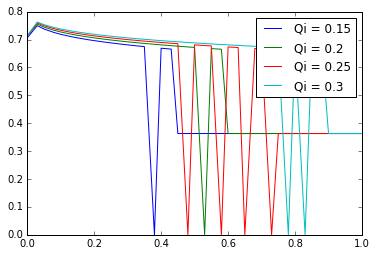

In [205]:
Qi=.15
while Qi<=1/m_line:
    Saturations_in_Streamtube()
    Qi = Qi +.05

[ 0.9999      0.2         0.33333333  0.53333333  0.66666667  0.86666667
  1.          1.2         1.33333333  1.53333333  1.66666667  1.83333333
  2.          2.2         2.33333333  2.53333333  2.66666667  2.86666667
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        ] f_prime_sw
krw_j [ 0.33022986  0.51584026  0.45948447  0.40488653  0.37841713  0.34725739
  0.33022986  0.30848638  0.2961541   0.2796366   0.26989525  0.25884663
  0.24876092  0.23774614  0.23100096         nan  0.21565617  0.20738734
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        ]
lambda_rw_j_bar [  0.00000000e+

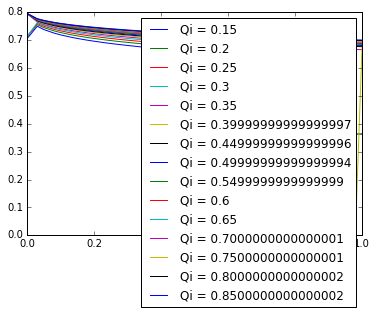

In [201]:
if manual =='Yes':
    Qi=.15
    while Qi<=1/m_line:
        Saturations_in_Streamtube()
        Qi = Qi +.05
    while Qi<=.9:
        Saturations_in_Streamtube_abt()
        Qi = Qi +.05
        
    
# output high resoltuion jpeg
plt.savefig('destination_path.jpeg', format='jpeg', dpi=1000)


[ 0.          0.04545455  0.07575758  0.12121212  0.15151515  0.1969697
  0.22727273  0.27272727  0.3030303   0.34848485  0.37878788  0.41666667
  0.45454545  0.5         0.53030303  0.57575758  0.60606061  0.65151515
  0.68181818  0.72727273  0.75757576  0.8030303   0.83333333  0.87878788
  0.90909091  0.95454545  0.98484848  1.03030303  1.06060606  1.10606061
  1.13636364  1.18181818  1.21212121  1.25757576  1.28787879  1.33333333
  1.36363636  1.40909091  1.43939394  1.48484848  1.51515152] f_prime_sw
lambda_r_inv [ 1.25792999  0.9346956   1.06265616  1.13578246  1.20090881  1.25594499
  1.30798334  1.35475546  1.40002266  1.44206841  1.48270083  1.51740085
  1.55487285  1.59454334  1.62981466  1.66374358  1.69753868  1.72977965
  1.76169066  1.79264389  1.8231183   1.85290497  1.88294773  1.912222
  1.94078763  1.96891626  1.9971585   2.02443608  2.05175513  2.07900234
  2.10576391  2.1318985   2.15849259  2.18442098  2.21025409  2.23589843
  2.26141385  2.28670692  2.31183655  2.3

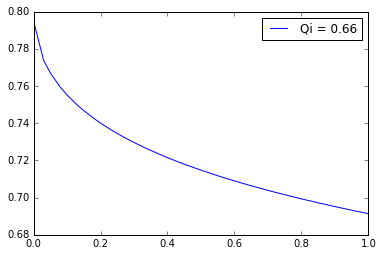

In [203]:
Qi=.66
while Qi<=.66:
    Saturations_in_Streamtube_abt()
    Qi = Qi +.05

In [173]:
dframe.G_J

0      0.00
1     19.07
2      1.42
3      0.83
4      0.59
5      0.46
6      0.37
7      0.32
8      0.27
9      0.24
10     0.22
11     0.20
12     0.18
13     0.16
14     0.15
15     0.14
16     0.13
17     0.12
18     0.12
19     0.11
20     0.11
21     0.11
22     0.11
23     0.12
24     0.12
25     0.13
26     0.14
27     0.15
28     0.16
29     0.18
30     0.20
31     0.22
32     0.24
33     0.27
34     0.32
35     0.37
36     0.46
37     0.59
38     0.83
39     1.42
40    19.07
Name: G_J, dtype: float64

In [16]:



#apparent viscosity for 1-Sor>Sw>Swf    
for i in range(no_of_Swf,no_of_sats):
    vis_ap[i] = 1/((kro[i]/mu_oil) + (krw[i]/mu_water))



IndentationError: unexpected indent (<ipython-input-16-e95bc49db947>, line 4)

In [18]:
Sw_j

NameError: name 'Sw_j' is not defined

In [57]:
1/m_line

0.33587767977610578

In [ ]:
(Sw_j.mean() -Siw)

In [ ]:
#initializing Apparent Viscosity Array
vis_ap =np.empty(no_of_sats)

In [ ]:
#apparent viscosity for Sw<Swf    to be used in equation 4.61
vis_ap_ro = 1/((kro[0]/mu_oil))
print(vis_ap_ro) 

#apparent viscosity for 1-Sor>Sw>Swf    
for i in range(no_of_Swf,no_of_sats):
    vis_ap[i] = 1/((kro[i]/mu_oil) + (krw[i]/mu_water))


In [ ]:
# apparent viscosity calcualtion for breakthrough Swf using trapezoidal method
# -ve sign is to compensate for limits of intergration from  f'sw2(swf in this case for breakthrough) to zero instead of zero to
# f'sw2
-np.trapz(vis_ap[no_of_Swf:],fw_dash[no_of_Swf:])/fw_dash[no_of_Swf]


#use this to calculate q@breakthrough from equation 3.125

In [ ]:
plt.plot(fw_dash[no_of_Swf:],vis_ap[no_of_Swf:])
plt.xlabel("$f'_{Sw}$",fontsize=16)
plt.ylabel(r"$\lambda$$^{-1}$",fontsize=16)
plt.title(r"$\lambda$$^{-1}$ $v/s$ $f'_{Sw}$" ,fontsize=16)


In [ ]:
#initializing Q_inj, Apparent Viscoisty and Sw2 Arrays
Q_inj=np.empty(no_of_sats)
apvis=np.empty(no_of_sats)
Sw2=np.empty(no_of_sats)



In [ ]:
#calculating apvis for various all Sw>Swf
for i in range(no_of_Swf+1,no_of_sats):
    Sw2[i]=Sw[i]
    Q_inj[i]=1/fw_dash[i]
    apvis[i]=-np.trapz(vis_ap[i:],fw_dash[i:])/fw_dash[i]

In [ ]:
#creating a dataframe of f'sw , apvis, Sw2, Q_inj
d = {"f'sw":fw_dash[no_of_Swf+1:], 'Apvis':apvis[no_of_Swf+1:],'Q_inj': Q_inj[no_of_Swf+1:]}
df = pd.DataFrame(data=d,index = Sw2[no_of_Swf+1:])
df.index.name = 'Sw2'

In [ ]:
#increasing display of maximum no of rows displayed in Dataframe
pd.set_option('display.max_rows', 2000)
df

In [ ]:
#just a check
plt.plot(Sw2[no_of_Swf+1:],apvis[no_of_Swf+1:])